In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [66]:
P = 7
P_range = [1, 2, 4, 8, 12, 16, 20]

In [67]:
dft = [[0] * P for _ in range(3)]
fft = [[0] * P for _ in range(3)]

for ind, val in enumerate([128, 512, 2048]):
    dft[ind] = pd.read_excel(f"dft{val}.xlsx", skiprows = 0)
    dft[ind][['p', 't']] = pd.DataFrame(dft[ind]['p, t'].str.split(',').tolist())
    fft[ind] = pd.read_excel(f"fft{val}.xlsx",  skiprows = 0)
    fft[ind][['p', 't']] = pd.DataFrame(fft[ind]['p, t'].str.split(',').tolist())


In [68]:
dft[0]

,"p, t",p,t
0,"1,4.78338",1,4.78338
1,"2,4.49634",2,4.49634
2,"4,4.50318",4,4.50318
3,"8,4.41667",8,4.41667
4,"12,4.41891",12,4.41891
5,"16,4.42945",16,4.42945
6,"20,4.50237",20,4.50237


In [69]:
baseline_time_dft = [0] * 3
baseline_time_fft = [0] * 3
acceleration_id = [1 + i for i in P_range]
acceleration_dft = [np.ones(P) for _ in range(3)]
acceleration_fft = [np.ones(P) for _ in range(3)]

for i in range(3):
    baseline_time_dft[i] = dft[i]['t'].iloc[0]
    baseline_time_fft[i] = fft[i]['t'].iloc[0]
    
for j in range(3):    
    for i in range(1, P):
    
        acceleration_dft[j][i] = float(baseline_time_dft[j]) / float(dft[j]['t'].iloc[i])
        acceleration_fft[j][i] = float(baseline_time_fft[j]) / float(fft[j]['t'].iloc[i])

In [70]:
acceleration_dft

[array([1.        , 1.06383859, 1.0622227 , 1.08302862, 1.08247962,
        1.07990383, 1.0624138 ]),
 array([1.        , 0.98882723, 1.00130787, 1.00669419, 0.99783851,
        1.01421778, 1.00820607]),
 array([1.        , 1.00826453, 1.02259405, 1.01805081, 1.01219597,
        1.02376044, 1.02051644])]

Text(0, 0.5, 'Ускорение')

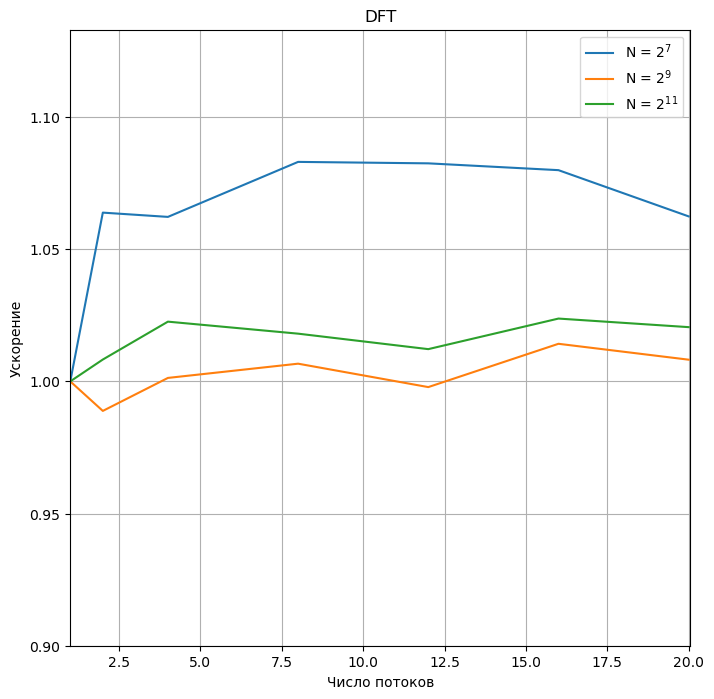

In [96]:
plt.figure(figsize=(8,8))
#plt.plot(P_range, acceleration_id, label = "ideal", ls = ":", lw = 1.0)
plt.plot(P_range,acceleration_dft[0], label = "N = $2^7$")
plt.plot(P_range,acceleration_dft[1], label = "N = $2^9$")
plt.plot(P_range,acceleration_dft[2], label = "N = $2^{11}$")
plt.xlim(1, max(P_range) + 0.05)
plt.ylim(0.9, max(acceleration_dft[0]) + 0.05)
plt.title(r'DFT')
plt.grid()
plt.legend()
plt.xlabel("Число потоков")
plt.ylabel("Ускорение")

Text(0, 0.5, 'Ускорение')

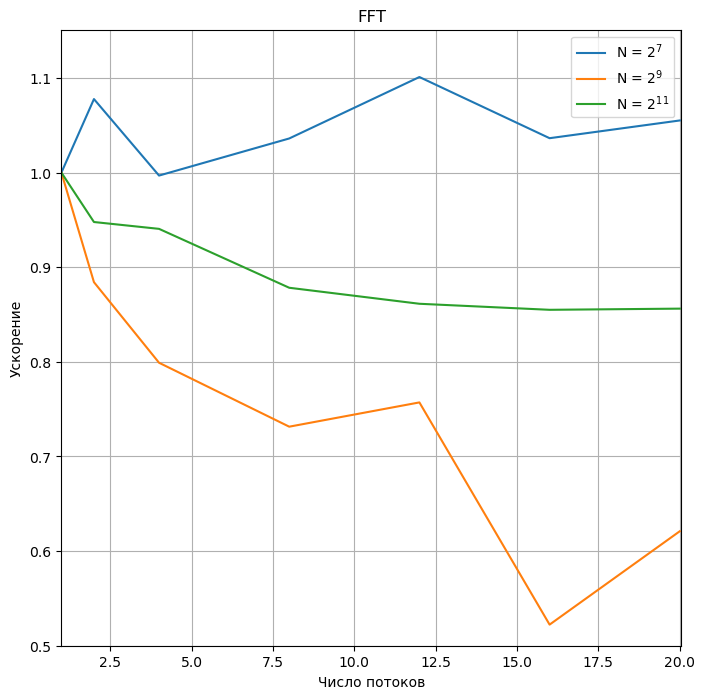

In [97]:
plt.figure(figsize=(8,8))
#plt.plot(P_range, acceleration_id, label = "ideal", ls = ":", lw = 1.0)
plt.plot(P_range,acceleration_fft[0], label = "N = $2^7$")
plt.plot(P_range,acceleration_fft[1], label = "N = $2^9$")
plt.plot(P_range,acceleration_fft[2], label = "N = $2^{11}$")
plt.xlim(1, max(P_range) + 0.05)
plt.ylim(0.5, max(acceleration_fft[0]) + 0.05)
plt.title(r'FFT')
plt.grid()
plt.legend()
plt.xlabel("Число потоков")
plt.ylabel("Ускорение")

Text(0, 0.5, 'время выполнения, с')

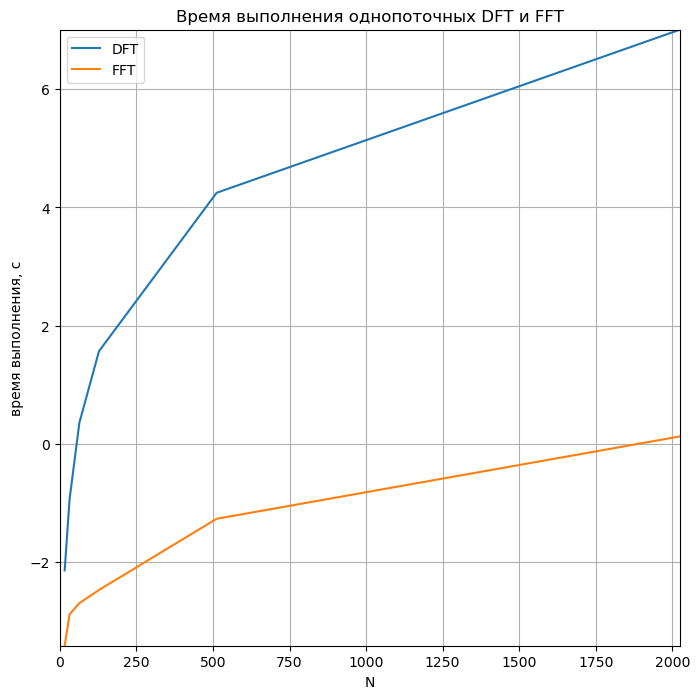

In [91]:
times_dft = [0.116733, 0.390647, 1.42452, 4.78338, 69.9884, 1108.4231] 
times_fft = [0.0325864, 0.0554855, 0.0669668, 0.0837979, 0.279804, 1.12865]
N = [16, 32, 64, 128, 512, 2024]
plt.figure(figsize=(8,8))
plt.plot(N, np.log(times_dft), label = 'DFT')
plt.plot(N, np.log(times_fft), label = 'FFT')
plt.title('Время выполнения однопоточных DFT и FFT')
plt.xlim(0,max(N))
plt.ylim(min(np.log(times_fft)), max(np.log(times_dft)))
plt.grid()
plt.legend()
plt.xlabel("N")
plt.ylabel("время выполнения, с")